<center><h1> Predicting Length of Stay for Patients </h1></center>

In [54]:
# Importing libraries necessary for the modelling
import numpy as np
import pandas as pd

# Visualalization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split


#### Reading the Data

In [55]:
data = pd.read_csv('HealthCareDataSet.csv')
data.drop(['Id'],axis=1,inplace = True)       # dropping ID column as no analysis is to be done on this feature
data.shape                                    # number of rows and columns in the dataset

(10999, 12)

## 1. Data Cleaning

#### 1.1 Handling Missing values

In [56]:
data.isnull().sum()

LengthOfStay                 0
ReadmissionCount          5570
Gender                       0
FacilityId                   0
KidneyAilments           10999
HeartAilments            10999
PyschologicalAilments        0
SubstanceAbuseHistory      392
BMI                          2
ABG                          0
Pulse                        2
SecondaryDiagnosis         239
dtype: int64

In [57]:
data.SubstanceAbuseHistory.value_counts()

SubstanceAbuseHistory
No         9080
Yes        1517
Some          3
Slight        3
Few           3
Unknown       1
Name: count, dtype: int64

- Will replace all missing values with 'unknown'
- Combine categories like some, slight and few to 'Yes'

In [58]:
data['SubstanceAbuseHistory'].replace(to_replace=['Some','Slight','Few'],value='Yes',inplace=True)

In [59]:
data.KidneyAilments.value_counts()

Series([], Name: count, dtype: int64)

In [60]:
data.HeartAilments.value_counts()

Series([], Name: count, dtype: int64)

In [61]:
data.ReadmissionCount.value_counts()

ReadmissionCount
1.0    2701
2.0    1422
3.0     736
4.0     380
5.0     190
Name: count, dtype: int64

In [62]:
data.SecondaryDiagnosis.value_counts()

SecondaryDiagnosis
1.0     4196
2.0     2610
3.0     1568
4.0      946
5.0      545
6.0      363
7.0      221
8.0      133
0.0       81
9.0       59
10.0      38
Name: count, dtype: int64

In [63]:
data.drop(['KidneyAilments','HeartAilments'],axis=1,inplace = True)            # Dropping these columns as all data points are null in this feature
data['SubstanceAbuseHistory'] = data['SubstanceAbuseHistory'].fillna('Unknown')     # replacing missing values with existing category - 'Unknown'
data['ReadmissionCount'] = data['ReadmissionCount'].fillna(1.0)             # filling up missing data in this column with the MODE
data['SecondaryDiagnosis'] = data['SecondaryDiagnosis'].fillna(1.0)             # filling up missing data in this column with the MODE
data.drop(['FacilityId'],axis=1,inplace=True)                          # This feature is the ID for every facility, does not provide any info

In [64]:
data.isnull().sum()

LengthOfStay             0
ReadmissionCount         0
Gender                   0
PyschologicalAilments    0
SubstanceAbuseHistory    0
BMI                      2
ABG                      0
Pulse                    2
SecondaryDiagnosis       0
dtype: int64

In [65]:
data.describe()

,LengthOfStay,ReadmissionCount,BMI,ABG,Pulse,SecondaryDiagnosis
count,10999.000000,10999.000000,10997.000000,10999.000000,10997.000000,10999.000000
mean,4.554232,1.435858,29.059925,142.644591,77.751023,2.415492
std,3.302963,0.891275,2.006137,30.329310,18.135555,1.772709
min,1.000000,1.000000,19.800000,-1.010000,10.000000,0.000000
25%,2.000000,1.000000,27.700000,123.000000,65.000000,1.000000
50%,4.000000,1.000000,29.000000,143.000000,78.000000,2.000000
75%,6.000000,1.000000,30.400000,163.000000,90.000000,3.000000
max,29.000000,5.000000,36.700000,253.000000,148.000000,10.000000


In [66]:
print('BMI Skewness: ',data.BMI.skew())
print('ABG Skewness: ',data.ABG.skew())
print('Pulse Skewness: ',data.Pulse.skew())

BMI Skewness:  0.009490073032178605
ABG Skewness:  -0.16247525191238377
Pulse Skewness:  0.019439814221374058


- Numerical Features like Length of Stay, BMI, ABG and Pulse have mean very close to the median. This means that the data has very less skewness and for missing data imputation we can use either mean or median.
- Readmission count and Secondary Diagnosis and actually categorical data that we will be changing the type of later on
- As the skewness for the numerical features are very less we can assume that the data is normal with mean and median having similar values

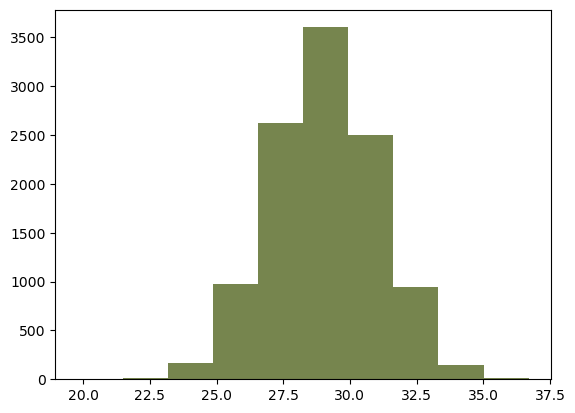

In [67]:
plt.hist(data['BMI'],color='#76854E')
plt.show()

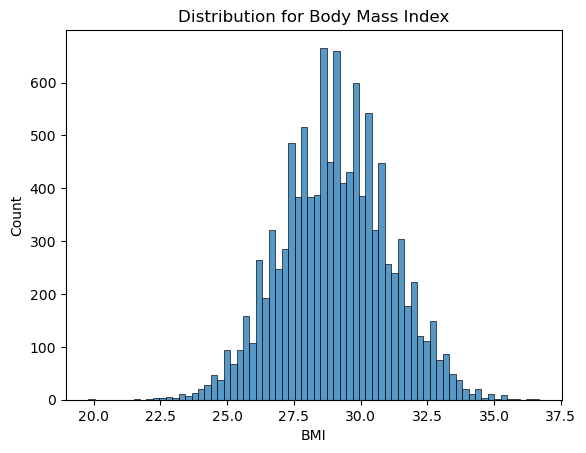

In [68]:
sns.histplot(data['BMI'])
plt.title('Distribution for Body Mass Index')
plt.show()

In [69]:
# From the chart above we can see that the data is normal. With mean alomost equal to the median
data['BMI'] = data['BMI'].fillna(data['BMI'].median())               # filling up missing data points in this numerical feature with the median

From the distribution plot we see that the data is mostly normal. So, we replace missing values with either mean or median

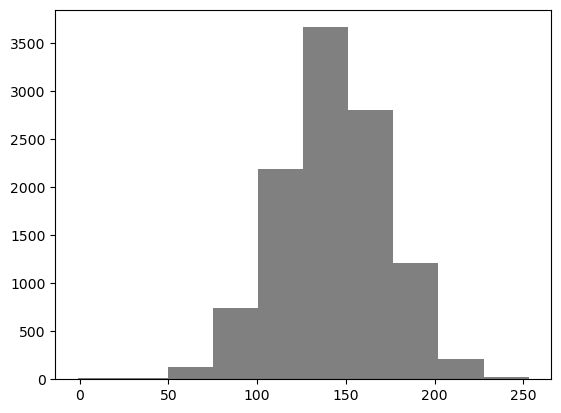

In [70]:
plt.hist(data['ABG'],color='grey')
plt.show()

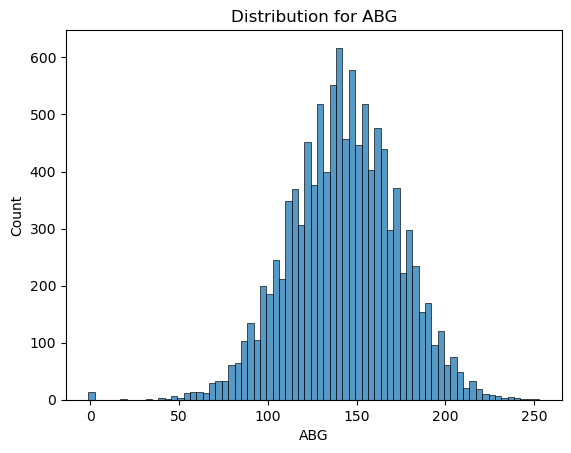

In [71]:
sns.histplot(data['ABG'])
plt.title('Distribution for ABG')
plt.show()

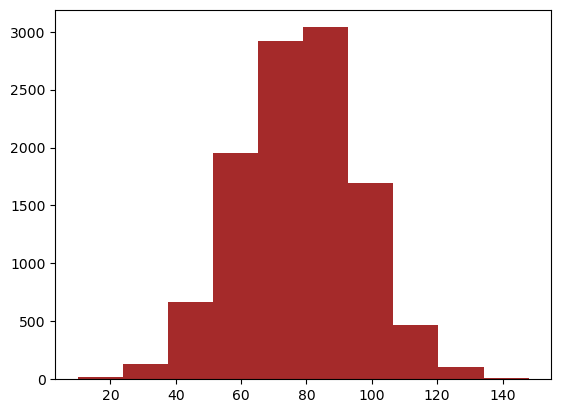

In [72]:
plt.hist(data['Pulse'],color='brown')
plt.show()

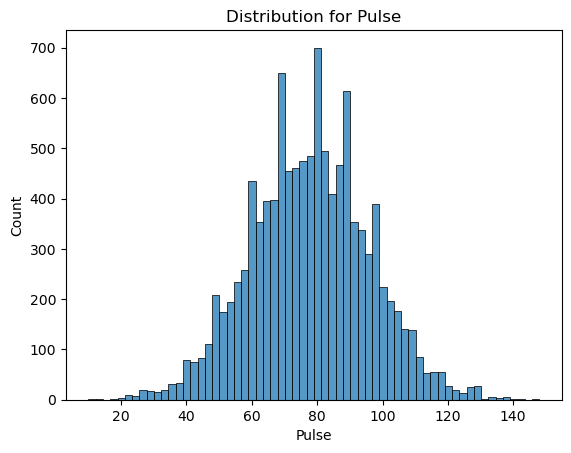

In [73]:
sns.histplot(data['Pulse'])
plt.title('Distribution for Pulse')
plt.show()

In [74]:
# From the chart above we can see that the data is normal. With mean alomost equal to the median
data['Pulse'] = data['Pulse'].fillna(data['Pulse'].median())               # filling up missing data points in this numerical feature with the median

In this distribution plot as well we see that the data is mostly normal. So, we replace missing values with either mean or median

In [75]:
data.isnull().sum()           # all missing values have been handled

LengthOfStay             0
ReadmissionCount         0
Gender                   0
PyschologicalAilments    0
SubstanceAbuseHistory    0
BMI                      0
ABG                      0
Pulse                    0
SecondaryDiagnosis       0
dtype: int64

#### 1.2 Handling Feature Data types

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LengthOfStay           10999 non-null  int64  
 1   ReadmissionCount       10999 non-null  float64
 2   Gender                 10999 non-null  object 
 3   PyschologicalAilments  10999 non-null  bool   
 4   SubstanceAbuseHistory  10999 non-null  object 
 5   BMI                    10999 non-null  float64
 6   ABG                    10999 non-null  float64
 7   Pulse                  10999 non-null  float64
 8   SecondaryDiagnosis     10999 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 698.3+ KB


In [77]:
data['ReadmissionCount'] = data['ReadmissionCount'].astype('int').astype('object')
data['PyschologicalAilments'] = data['PyschologicalAilments'].astype('object')
data['SecondaryDiagnosis'] = data['SecondaryDiagnosis'].astype('int').astype('object')

#### 1.3 Outlier Analysis

In [78]:
data.to_csv('HealthCareDataSet_cleaned.csv',index=False)

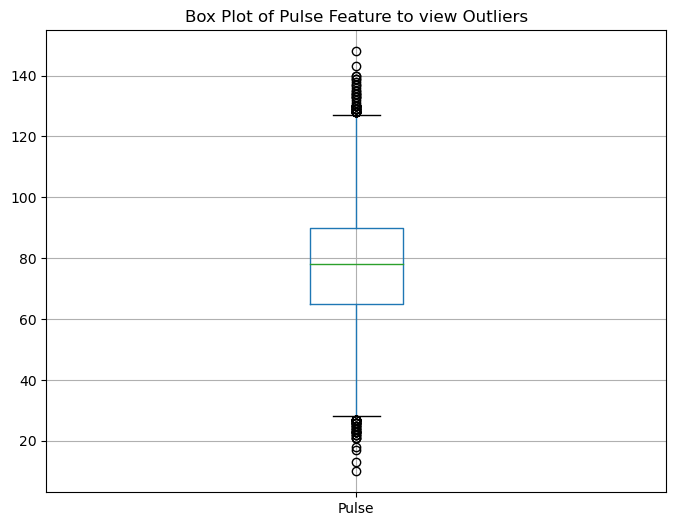

In [79]:
# Visualizing the Pulse
# The outliers are points displayed above and below the upper lower limits

plt.figure(figsize=(8, 6))
data.boxplot(column='Pulse')
plt.title('Box Plot of Pulse Feature to view Outliers')
plt.show()


In [80]:
Q1 = data['Pulse'].quantile(0.25)
Q3 = data['Pulse'].quantile(0.75)
lower_limit = Q1 - 1.5 * (Q3 - Q1)
upper_limit = Q3 + 1.5 * (Q3 - Q1)

print('Number of records with BMI outliers are :)', data[(data['Pulse'] < lower_limit) | (data['Pulse'] > upper_limit)].shape[0])
data[(data['Pulse'] < lower_limit) | (data['Pulse'] > upper_limit)]

Number of records with BMI outliers are :) 91


,LengthOfStay,ReadmissionCount,Gender,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis
259,13,4,M,False,No,29.4,150.0,129.0,5
296,8,1,F,False,Yes,30.0,190.0,26.0,6
359,4,1,F,False,No,31.3,128.0,130.0,2
411,3,1,M,False,No,27.7,134.0,138.0,2
538,5,1,F,False,No,30.5,145.0,27.0,4
...,...,...,...,...,...,...,...,...,...
10145,2,1,M,False,No,29.3,118.0,143.0,1
10170,2,1,F,False,No,30.5,121.0,134.0,2
10243,5,1,F,False,No,27.7,124.0,133.0,3
10282,2,2,F,False,No,32.9,103.0,27.0,1


- There are 91 records having BMI values that are outliers
- Options to consider taking care of the outliers are:<br>
        - dropping records<br>
        - replace with mean, median <br>
        - reaplcing with upper or lower limit values

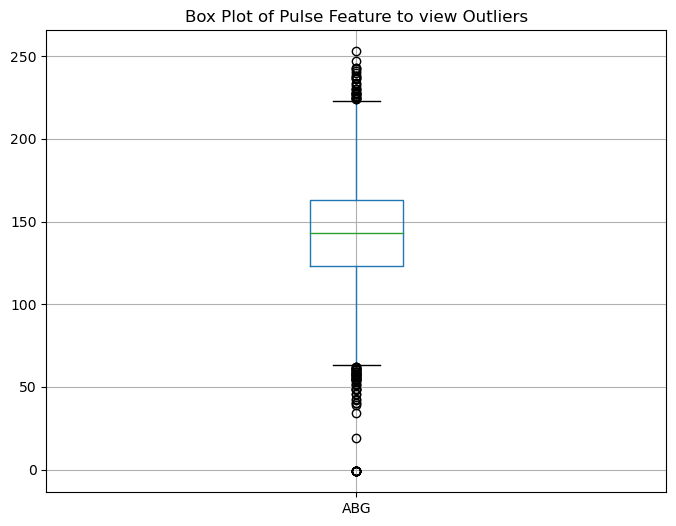

In [81]:
# Visualizing ABG
# The outliers are points displayed above and below the upper lower limits

plt.figure(figsize=(8, 6))
data.boxplot(column='ABG')
plt.title('Box Plot of Pulse Feature to view Outliers')
plt.show()


In [82]:
Q1 = data['ABG'].quantile(0.25)
Q3 = data['ABG'].quantile(0.75)
lower_limit = Q1 - 1.5 * (Q3 - Q1)
upper_limit = Q3 + 1.5 * (Q3 - Q1)

print('Number of records with ABG outliers are :)', data[(data['ABG'] < lower_limit) | (data['ABG'] > upper_limit)].shape[0])
data[(data['ABG'] < lower_limit) | (data['ABG'] > upper_limit)]

Number of records with ABG outliers are :) 97


,LengthOfStay,ReadmissionCount,Gender,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis
133,9,4,F,False,No,32.5,241.0,88.0,2
159,1,1,F,False,No,31.3,49.0,83.0,1
285,8,1,F,False,Yes,29.6,238.0,50.0,4
362,5,5,F,False,No,29.4,57.0,105.0,1
428,3,1,M,False,No,28.3,57.0,77.0,3
...,...,...,...,...,...,...,...,...,...
10276,2,1,F,False,No,25.5,228.0,66.0,1
10323,5,1,F,False,No,28.5,46.0,61.0,6
10707,7,1,M,False,No,30.2,234.0,75.0,3
10791,6,1,F,False,No,33.0,237.0,82.0,2


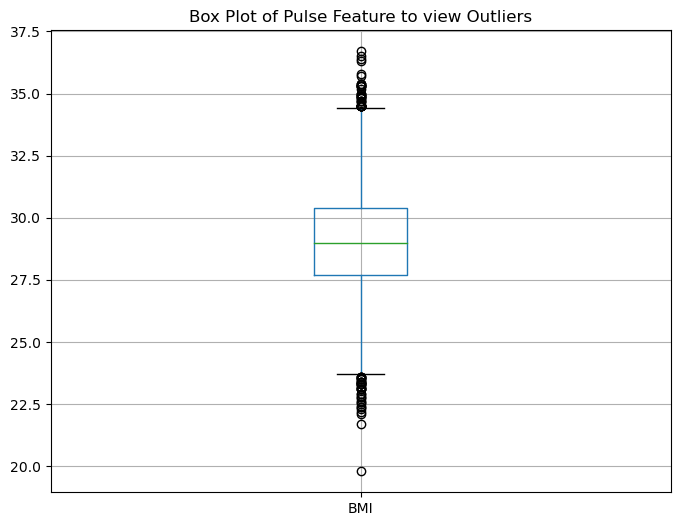

In [83]:
# Visualizing BMI
# The outliers are points displayed above and below the upper lower limits

plt.figure(figsize=(8, 6))
data.boxplot(column='BMI')
plt.title('Box Plot of Pulse Feature to view Outliers')
plt.show()


In [84]:
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
lower_limit = Q1 - 1.5 * (Q3 - Q1)
upper_limit = Q3 + 1.5 * (Q3 - Q1)

print('Number of records with BMI outliers are :)', data[(data['BMI'] < lower_limit) | (data['BMI'] > upper_limit)].shape[0])
data[(data['BMI'] < lower_limit) | (data['BMI'] > upper_limit)]

Number of records with BMI outliers are :) 76


,LengthOfStay,ReadmissionCount,Gender,PyschologicalAilments,SubstanceAbuseHistory,BMI,ABG,Pulse,SecondaryDiagnosis
168,5,1,M,False,No,23.6,98.0,87.0,4
217,3,1,M,False,No,34.9,111.0,86.0,2
408,5,1,F,False,No,23.4,133.0,97.0,3
681,1,1,M,False,No,35.3,68.0,83.0,2
725,2,2,M,False,No,23.4,95.0,66.0,1
...,...,...,...,...,...,...,...,...,...
10180,3,1,F,False,Yes,23.1,169.0,101.0,1
10407,2,1,F,False,No,22.7,138.0,91.0,2
10412,4,1,M,False,No,23.4,133.0,97.0,2
10472,1,1,F,False,No,22.2,149.0,64.0,1


In [85]:
#### Replace Outliers with Upper and lower limit 

## 2. Exploratory Data Analysis

In [86]:
data.PyschologicalAilments.value_counts()

PyschologicalAilments
False    10396
True       603
Name: count, dtype: int64

In [87]:
data.Gender.replace({'F':1,'M':0},inplace = True)
data.PyschologicalAilments.replace({'False':0,'True':1},inplace = True)


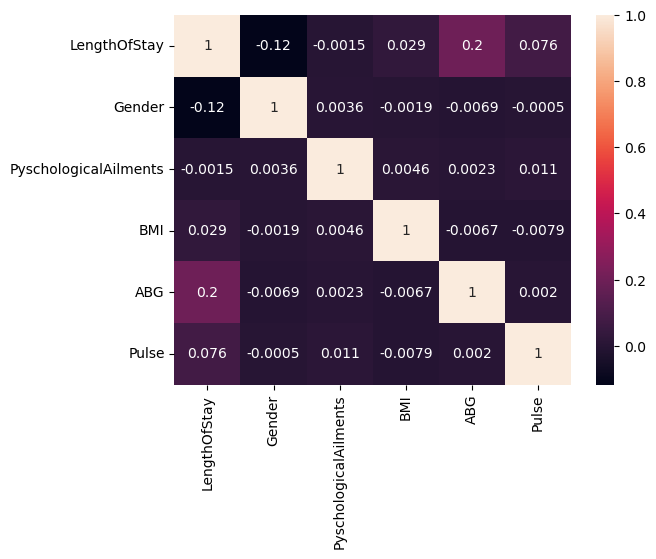

In [88]:
sns.heatmap(data.select_dtypes(exclude='object').corr(),annot = True)
plt.show()

In [89]:
correlationOfFeatures = data.corr(numeric_only=False)
sns.heatmap(data=correlationOfFeatures, annot=True)

ValueError: could not convert string to float: 'No'

## 3. Modelling

#### Notes:
- Outlier Analysis - Ignore
- Correlation Analysis (keep all features)
- encode categorical data
- Train test split
- standard scaler on numerical features
- modelling OLS
- model evaluation (MSE, R2 squared, accuracy score)

